The purpose of this notebook is to implement <b>batch gradient descent</b>, and the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to train a simple linear regression model on a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import metrics

To have a dataset or set of data points, we generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [3]:
a, b = -2, 1
x = np.linspace(0, 20)
y = a*x+b
x.shape

(50,)

#### Plot your data points. 

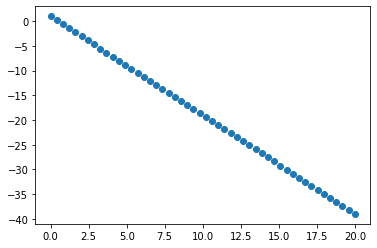

In [4]:
plt.scatter(x,y)
plt.show()

In [5]:
x = x.reshape(-1, 1)
y = y.reshape(-1,1)

In [6]:
print("x shape: {}\ty shape: {}".format(x.shape, y.shape))

x shape: (50, 1)	y shape: (50, 1)


# Batch Gradient Descent

In [7]:
def hypothesis(features, theta_vector):
    return features@theta_vector

In [8]:
def costFunction(predicted_output, actual_output):
    m = actual_output.shape[0]  #Number of observations
    return ( 1/(2*m) )*( np.linalg.norm(predicted_output-actual_output, 2)**2 )

In [9]:
def gradient(features, predicted_output, actual_output):
    m = actual_output.shape[0]  #Number of observations
    return (1/m)*features.T@(predicted_output-actual_output)

In [10]:
def update_parameters(theta_vect, gradient_vect, learning_rate):
    theta_vect = theta_vect - learning_rate*gradient_vect
    return theta_vect

In [11]:
def GD_batch(features, actual_output, theta_vector=np.array([0,0]).reshape(-1,1), learning_rate=0.001, max_iter = 1000, tolerence=0.0001):
    
    #Add x0 (ones) column to the features
    x0 = np.ones((features.shape[0],1))
    features = np.append(x0, features, axis=1)
        
    cost = 1000
    n_iter = 1
    
    #Lists to store generated values of each iteration
    all_theta0 = []
    all_theta1 = []
    all_cost = []
    all_predicted = []
    
    #append initial values of theta
    all_theta0.append(theta_vector[0])
    all_theta1.append(theta_vector[1])
    
    while cost> tolerence and n_iter<max_iter:
        n_iter += 1
        
        #calculated the predicted values
        predicted_output = hypothesis(features, theta_vector)
        all_predicted.append(predicted_output)
    
        #calculate cost
        cost = costFunction(predicted_output, actual_output)
        all_cost.append(cost)
        
        #calculate gradient
        grad_vector = gradient(features, predicted_output, actual_output)
        
        #update parameters
        theta_vector = update_parameters(theta_vector, grad_vector, learning_rate)
        all_theta0.append(theta_vector[0])
        all_theta1.append(theta_vector[1])
        
    
    predicted_output = hypothesis(features, theta_vector)
    all_predicted.append(predicted_output)

    cost = costFunction(predicted_output, actual_output)
    all_cost.append(cost)
    
    return (all_theta0, all_theta1, all_cost, all_predicted, theta_vector, n_iter)

In [12]:
alpha = 0.01
all_theta0, all_theta1, all_loss, all_predicted, final_theta , n_iter = GD_batch(x,y, learning_rate=alpha, tolerence=0.001, max_iter=2000)
print(f'theta0 shape {len(all_theta0)}, theta1 shape {len(all_theta1)},\nloss shape {len(all_loss)}, pred shape {len(all_predicted)}, final theta {final_theta},\nn_iter {n_iter}')

theta0 shape 1001, theta1 shape 1001,
loss shape 1001, pred shape 1001, final theta [[ 0.91211495]
 [-1.99346277]],
n_iter 1001


R2 score:  0.999985664043783


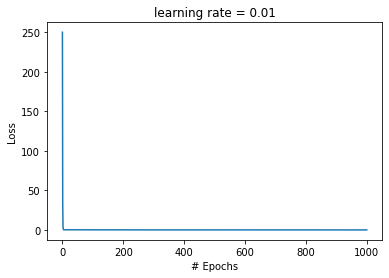

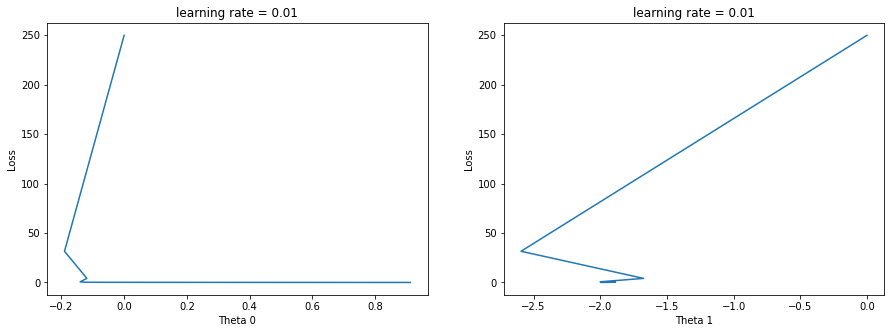

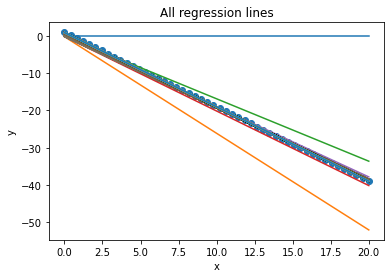

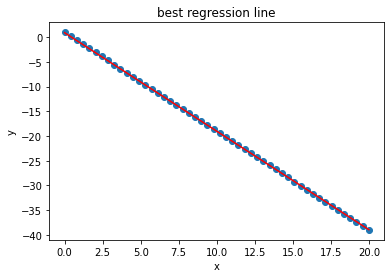

In [13]:
R2_score = metrics.r2_score(y, all_predicted[-1])
print("R2 score: ",R2_score)

plt.plot(range(n_iter),all_loss)
plt.xlabel("# Epochs")
plt.ylabel("Loss")
plt.title("learning rate = {}".format(alpha))
plt.show()


plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(all_theta0,all_loss)
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.title("learning rate = {}".format(alpha))

plt.subplot(1, 2, 2)
plt.plot(all_theta1,all_loss)
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.title("learning rate = {}".format(alpha))
plt.show()


plt.scatter(x,y)
for i in range(n_iter):
    plt.plot(x, all_predicted[i])
    
plt.xlabel("x")
plt.ylabel("y")
plt.title("All regression lines")
plt.show()

plt.scatter(x,y)
plt.plot(x, all_predicted[-1], c='r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("best regression line")
plt.show()

# Momentum-based Gradient Descent

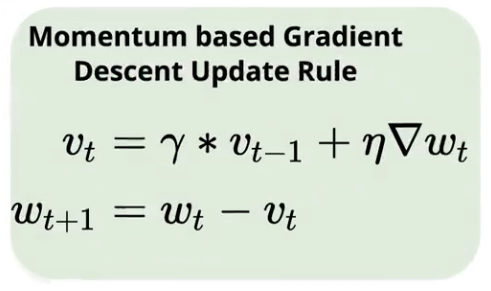

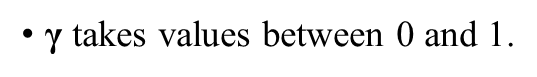

In [14]:
def hypothesis(features, theta_vector):
    return features@theta_vector

In [15]:
def costFunction(predicted_output, actual_output):
    m = actual_output.shape[0]  #Number of observations
    return ( 1/(2*m) )*( np.linalg.norm(predicted_output-actual_output, 2)**2 )

In [16]:
def gradient(features, predicted_output, actual_output):
    m = actual_output.shape[0]  #Number of observations
    return (1/m)*features.T@(predicted_output-actual_output)

In [17]:
def update_parameters(theta_vect, history_vect, gradient_vect, momentum_term, learning_rate):
    history_vect = momentum_term * history_vect+ learning_rate*gradient_vect
    theta_vect = theta_vect - history_vect
    return (theta_vect, history_vect)

In [18]:
def GD_momentum_batch(features, actual_output, theta_vector=np.array([0,0]).reshape(-1,1), learning_rate=0.001, momentum_term=0.1, max_iter = 1000, tolerence=0.0001):
    
    #Add x0 (ones) column to the features
    x0 = np.ones((features.shape[0],1))
    features = np.append(x0, features, axis=1)
    
    
    cost = 1000
    n_iter = 1
    vt_vector = np.zeros(theta_vector.shape) #initial momentum to 0
    
    #Lists to store generated values of each iteration
    all_theta0 = []
    all_theta1 = []
    all_cost = []
    all_predicted = []
    
    #append initial values of theta
    all_theta0.append(theta_vector[0])
    all_theta1.append(theta_vector[1])
    
    while cost> tolerence and n_iter<max_iter:
        n_iter += 1
        
        #calculated the predicted values
        predicted_output = hypothesis(features, theta_vector)
        all_predicted.append(predicted_output)
    
        #calculate cost
        cost = costFunction(predicted_output, actual_output)
        all_cost.append(cost)
        
        #calculate gradient
        grad_vector = gradient(features, predicted_output, actual_output)
        #update parameters
        theta_vector, vt_vector = update_parameters(theta_vector, vt_vector, grad_vector, momentum_term, learning_rate)
        all_theta0.append(theta_vector[0])
        all_theta1.append(theta_vector[1])
        
    
    predicted_output = hypothesis(features, theta_vector)
    all_predicted.append(predicted_output)

    cost = costFunction(predicted_output, actual_output)
    all_cost.append(cost)
    
    return (all_theta0, all_theta1, all_cost, all_predicted, theta_vector, n_iter)

In [19]:
alpha, gamma = 0.01, 0.1
all_theta0, all_theta1, all_loss, all_predicted, final_theta , n_iter = GD_momentum_batch(x,y, learning_rate=alpha, momentum_term=gamma, tolerence=0.001)
print(f'theta0 shape {len(all_theta0)}, theta1 shape {len(all_theta1)},\nloss shape {len(all_loss)}, pred shape {len(all_predicted)}, final theta {final_theta},\nn_iter {n_iter}')

theta0 shape 901, theta1 shape 901,
loss shape 901, pred shape 901, final theta [[ 0.91219075]
 [-1.99346841]],
n_iter 901


R2 score:  0.9999856887608923


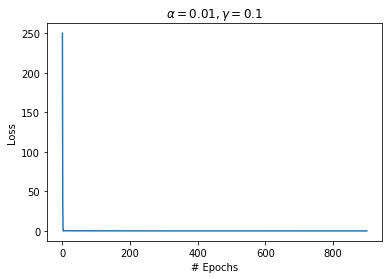

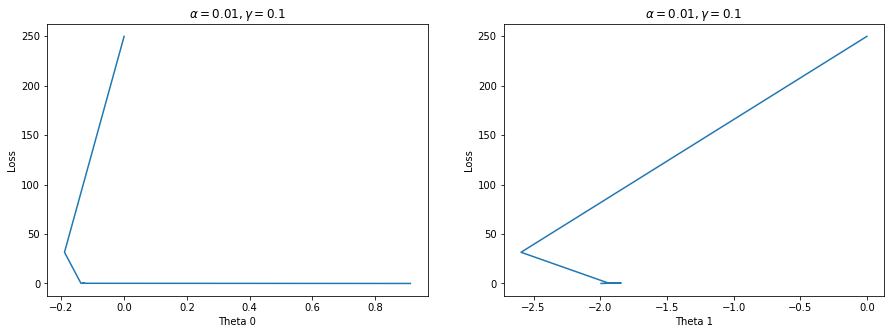

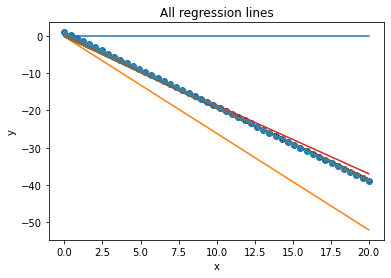

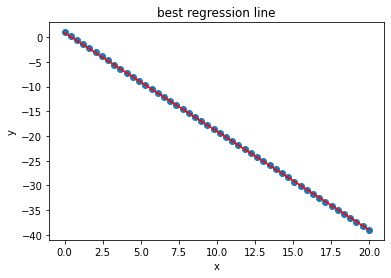

In [20]:
R2_score = metrics.r2_score(y, all_predicted[-1])
print("R2 score: ",R2_score)

plt.plot(range(n_iter),all_loss)
plt.xlabel("# Epochs")
plt.ylabel("Loss")
plt.title(r'$\alpha =  {},\gamma = {} $'.format(alpha, gamma))
plt.show()


plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(all_theta0,all_loss)
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.title(r'$\alpha =  {},\gamma = {} $'.format(alpha, gamma))

plt.subplot(1, 2, 2)
plt.plot(all_theta1,all_loss)
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.title(r'$\alpha =  {},\gamma = {} $'.format(alpha, gamma))
plt.show()


plt.scatter(x,y)
for i in range(n_iter):
    plt.plot(x, all_predicted[i])
    
plt.xlabel("x")
plt.ylabel("y")
plt.title("All regression lines")
plt.show()

plt.scatter(x,y)
plt.plot(x, all_predicted[-1], c='r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("best regression line")
plt.show()

#### Plot the best regression line

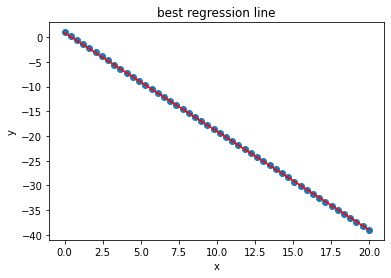

In [21]:
plt.scatter(x,y)
plt.plot(x, all_predicted[-1], c='r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("best regression line")
plt.show()

#### Try momentum term = 0

In [22]:
alpha, gamma = 0.01, 0
all_theta0, all_theta1, all_loss, all_predicted, final_theta , n_iter = GD_momentum_batch(x,y, learning_rate=alpha, momentum_term=gamma, tolerence=0.001)
print(f'theta0 shape {len(all_theta0)}, theta1 shape {len(all_theta1)},\nloss shape {len(all_loss)}, pred shape {len(all_predicted)}, final theta {final_theta},\nn_iter {n_iter}')

theta0 shape 1000, theta1 shape 1000,
loss shape 1000, pred shape 1000, final theta [[ 0.91188925]
 [-1.99344598]],
n_iter 1000


R2 score:  0.9999855903143118


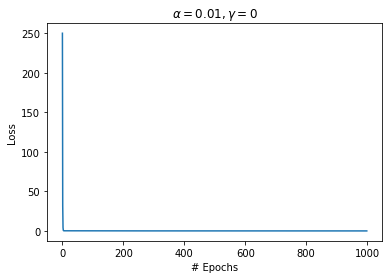

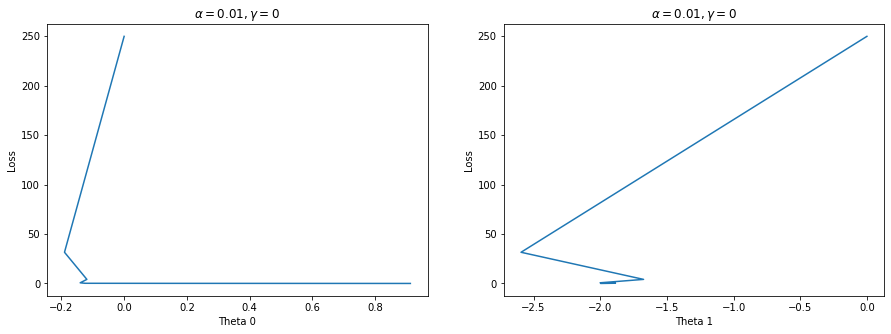

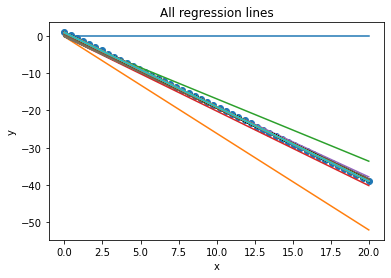

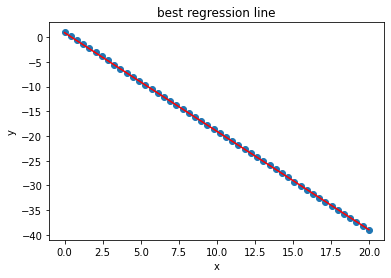

In [23]:
R2_score = metrics.r2_score(y, all_predicted[-1])
print("R2 score: ",R2_score)

plt.plot(range(n_iter),all_loss)
plt.xlabel("# Epochs")
plt.ylabel("Loss")
plt.title(r'$\alpha =  {},\gamma = {} $'.format(alpha, gamma))
plt.show()


plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(all_theta0,all_loss)
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.title(r'$\alpha =  {},\gamma = {} $'.format(alpha, gamma))

plt.subplot(1, 2, 2)
plt.plot(all_theta1,all_loss)
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.title(r'$\alpha =  {},\gamma = {} $'.format(alpha, gamma))
plt.show()


plt.scatter(x,y)
for i in range(n_iter):
    plt.plot(x, all_predicted[i])
    
plt.xlabel("x")
plt.ylabel("y")
plt.title("All regression lines")
plt.show()

plt.scatter(x,y)
plt.plot(x, all_predicted[-1], c='r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("best regression line")
plt.show()

# Nestrov Accelerated Gradient NAG

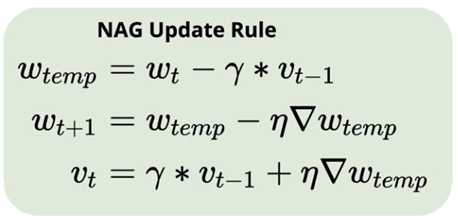

In [24]:
def hypothesis(features, theta_vector):
    return features@theta_vector

In [25]:
def costFunction(predicted_output, actual_output):
    m = actual_output.shape[0]  #Number of observations
    return ( 1/(2*m) )*( np.linalg.norm(predicted_output-actual_output, 2)**2 )

In [26]:
def gradient(features, predicted_output, actual_output):
    m = actual_output.shape[0]  #Number of observations
    return (1/m)*features.T@(predicted_output-actual_output)

In [27]:
def update_parameters(theta_vect, history_vect, thetaTemp_gradient_vect, momentum_term, learning_rate):
    theta_vect = theta_vect - learning_rate*thetaTemp_gradient_vect
    history_vect = momentum_term * history_vect+ learning_rate*thetaTemp_gradient_vect
    
    return (theta_vect, history_vect)

In [28]:
def GD_nag_batch(features, actual_output, theta_vector=np.array([0,0]).reshape(-1,1), learning_rate=0.001, momentum_term=0.1, max_iter = 1000, tolerence=0.0001):
    
    #Add x0 (ones) column to the features
    x0 = np.ones((features.shape[0],1))
    features = np.append(x0, features, axis=1)
    
    
    cost = 1000
    n_iter = 1
    vt_vector = np.zeros(theta_vector.shape) #initial momentum to 0
    
    #Lists to store generated values of each iteration
    all_theta0 = []
    all_theta1 = []
    all_cost = []
    all_predicted = []
    
    #append initial values of theta
    all_theta0.append(theta_vector[0])
    all_theta1.append(theta_vector[1])
    
    while cost> tolerence and n_iter<max_iter:
        n_iter += 1
        
        #calculated the predicted values
        predicted_output = hypothesis(features, theta_vector)
        all_predicted.append(predicted_output)
    
        #calculate cost
        cost = costFunction(predicted_output, actual_output)
        all_cost.append(cost)
        
        #calculate look-ahead step
        thetaTemp_vector = theta_vector - momentum_term*vt_vector
        
        #calculate gradient
        predicted_output_temp = hypothesis(features, thetaTemp_vector)
        thetaTemp_grad_vector = gradient(features, predicted_output_temp, actual_output)
        
        #update parameters
        theta_vector, vt_vector = update_parameters(theta_vector, vt_vector, thetaTemp_grad_vector, momentum_term, learning_rate)
        all_theta0.append(theta_vector[0])
        all_theta1.append(theta_vector[1])
        
    
    predicted_output = hypothesis(features, theta_vector)
    all_predicted.append(predicted_output)

    cost = costFunction(predicted_output, actual_output)
    all_cost.append(cost)
    
    return (all_theta0, all_theta1, all_cost, all_predicted, theta_vector, n_iter)

In [29]:
alpha, gamma = 0.01, 0.01
all_theta0, all_theta1, all_loss, all_predicted, final_theta , n_iter = GD_nag_batch(x,y, learning_rate=alpha, momentum_term=gamma, tolerence=0.001)
print(f'theta0 shape {len(all_theta0)}, theta1 shape {len(all_theta1)},\nloss shape {len(all_loss)}, pred shape {len(all_predicted)}, final theta {final_theta},\nn_iter {n_iter}')

theta0 shape 1000, theta1 shape 1000,
loss shape 1000, pred shape 1000, final theta [[ 0.91188339]
 [-1.99344554]],
n_iter 1000


R2 score:  0.9999855883980335


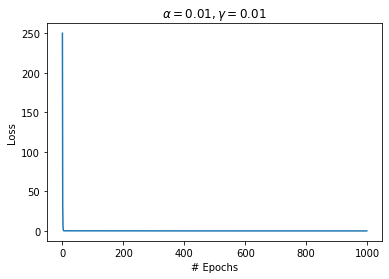

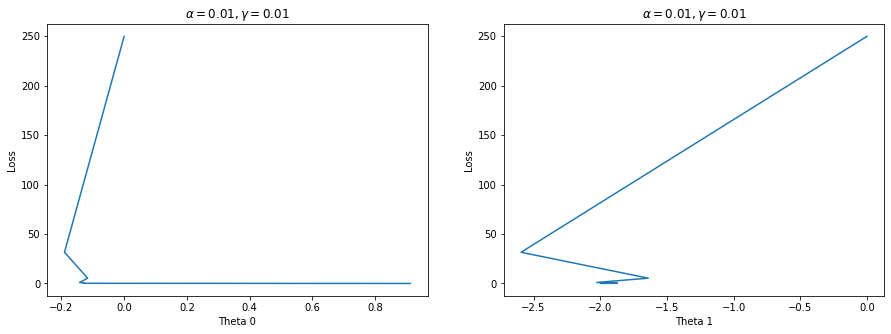

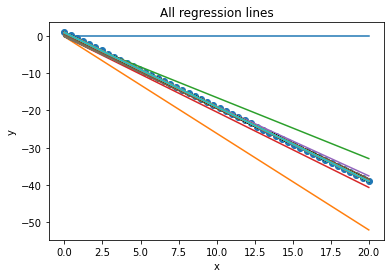

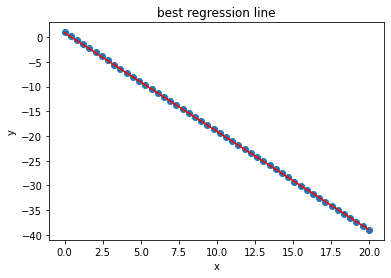

In [30]:
R2_score = metrics.r2_score(y, all_predicted[-1])
print("R2 score: ",R2_score)

plt.plot(range(n_iter),all_loss)
plt.xlabel("# Epochs")
plt.ylabel("Loss")
plt.title(r'$\alpha =  {},\gamma = {} $'.format(alpha, gamma))
plt.show()


plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(all_theta0,all_loss)
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.title(r'$\alpha =  {},\gamma = {} $'.format(alpha, gamma))

plt.subplot(1, 2, 2)
plt.plot(all_theta1,all_loss)
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.title(r'$\alpha =  {},\gamma = {} $'.format(alpha, gamma))
plt.show()


plt.scatter(x,y)
for i in range(n_iter):
    plt.plot(x, all_predicted[i])
    
plt.xlabel("x")
plt.ylabel("y")
plt.title("All regression lines")
plt.show()

plt.scatter(x,y)
plt.plot(x, all_predicted[-1], c='r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("best regression line")
plt.show()